# Untersuchung von NYC Beschwerden

Einfache Untersuchung von Beschwerden des "Department of Housing Preservation and Development of New York City". Es werden zunächst nur die meist häufigsten Beschwerden untersucht.
![screenshot from Result further down](Screenshot.png)

Inhalt:
1. Import und einführende Datenanalyse
2. Suche nach häufigsten Beschwerden
3. Beschwerde-Typen und Borough
4. Beschwerden zu ZIP-Code und Straße
5. Chloroplethenkarte von Borough/ZIP zu Beschwerden
6. Pearson, Spearman und Kendall Korellationen zu Gebäudeattributen
7. Zusammenfassung

### Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


%matplotlib inline

### Import Dataset 

In [4]:
#import data and display some data
df = pd.read_csv(r"/Users/Andreas/Downloads/fhrw-4uyv.csv")
df.head()

,address_type,borough,city,closed_date,complaint_type,created_date,incident_address,incident_zip,latitude,location_type,longitude,resolution_description,status,street_name,unique_key
0,NaN,Unspecified,NaN,2018-08-29T14:32:47.000,HPD Literature Request,2018-08-28T14:29:05.000,NaN,NaN,NaN,NaN,NaN,The literature will be emailed within 24 hours...,Closed,NaN,40125735
1,ADDRESS,MANHATTAN,NEW YORK,2019-04-04T12:44:34.000,PLUMBING,2019-03-29T13:39:15.000,2312 ADAM C POWELL BOULEVARD,10030.0,40.815723,RESIDENTIAL BUILDING,-73.943407,The Department of Housing Preservation and Dev...,Closed,ADAM C POWELL BOULEVARD,42089776
2,ADDRESS,MANHATTAN,NEW YORK,2019-04-04T21:04:49.000,DOOR/WINDOW,2019-03-29T12:39:24.000,1404 YORK AVENUE,10021.0,40.768572,RESIDENTIAL BUILDING,-73.952479,The Department of Housing Preservation and Dev...,Closed,YORK AVENUE,42089777
3,ADDRESS,BRONX,BRONX,2019-04-01T02:07:40.000,HEAT/HOT WATER,2019-03-29T08:52:02.000,215 WEST 242 STREET,10471.0,40.889564,RESIDENTIAL BUILDING,-73.899050,The complaint you filed is a duplicate of a co...,Closed,WEST 242 STREET,42090351
4,ADDRESS,BRONX,BRONX,2019-03-29T10:46:40.000,APPLIANCE,2019-02-05T08:20:59.000,1211 SOUTHERN BOULEVARD,10459.0,40.828949,RESIDENTIAL BUILDING,-73.891897,The Department of Housing Preservation and Dev...,Closed,SOUTHERN BOULEVARD,41645420


## Basic Properties

In [5]:
df.shape    #display shape

(5715521, 15)

In [6]:
df.info()    #summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715521 entries, 0 to 5715520
Data columns (total 15 columns):
address_type              object
borough                   object
city                      object
closed_date               object
complaint_type            object
created_date              object
incident_address          object
incident_zip              float64
latitude                  float64
location_type             object
longitude                 float64
resolution_description    object
status                    object
street_name               object
unique_key                int64
dtypes: float64(3), int64(1), object(11)
memory usage: 654.1+ MB


In [7]:
df.describe()     #basic statistical properties

,incident_zip,latitude,longitude,unique_key
count,5.633695e+06,5.633721e+06,5.633721e+06,5.715521e+06
mean,1.074844e+04,4.075399e+01,-7.391986e+01,2.879482e+07
std,5.129546e+02,9.090708e-02,5.685264e-02,7.360882e+06
min,1.000100e+04,4.049934e+01,-7.425312e+01,1.562973e+07
25%,1.045200e+04,4.067106e+01,-7.395197e+01,2.265376e+07
50%,1.046900e+04,4.075615e+01,-7.392249e+01,2.860421e+07
75%,1.122400e+04,4.083952e+01,-7.389025e+01,3.498116e+07
max,1.234500e+04,4.091287e+01,-7.370079e+01,4.214156e+07


In [8]:
df.columns      #display columns names

Index(['address_type', 'borough', 'city', 'closed_date', 'complaint_type',
       'created_date', 'incident_address', 'incident_zip', 'latitude',
       'location_type', 'longitude', 'resolution_description', 'status',
       'street_name', 'unique_key'],
      dtype='object')

## Beschwerde-Analyse

In [9]:
# Anzahl jeder Beschwerd-Types
df["complaint_type"].value_counts()

HEAT/HOT WATER            1125280
HEATING                    887869
PLUMBING                   688137
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       410339
PAINT - PLASTER            361258
PAINT/PLASTER              326346
ELECTRIC                   295967
NONCONST                   260890
DOOR/WINDOW                190064
WATER LEAK                 177327
GENERAL                    138587
FLOORING/STAIRS            129076
APPLIANCE                  105352
HPD Literature Request      53440
SAFETY                      46910
OUTSIDE BUILDING             6773
ELEVATOR                     5932
CONSTRUCTION                 5078
STRUCTURAL                     16
AGENCY                          9
VACANT APARTMENT                8
Name: complaint_type, dtype: int64

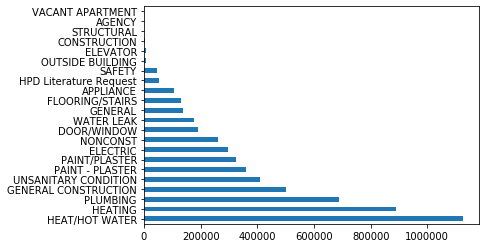

In [10]:
df["complaint_type"].value_counts().plot(kind="barh")
plt.show()

Die häufigsten Beschwerden sind "HEAT/HOT Water", "Heating" und "Plumbing", d.h. Probleme die mit der (beheizten) Wasserverorgung zu tun haben.

In [11]:
# alle Beschwerde-Typen für Borough
from IPython.display import display 
with pd.option_context("display.max_rows", 1000):
    display(df.groupby("borough")["complaint_type"].value_counts())

borough        complaint_type        
BRONX          HEAT/HOT WATER            366062
               HEATING                   195284
               PLUMBING                  171877
               UNSANITARY CONDITION      123783
               PAINT/PLASTER             108377
               GENERAL CONSTRUCTION      107868
               PAINT - PLASTER            79422
               ELECTRIC                   70532
               DOOR/WINDOW                61363
               WATER LEAK                 56806
               NONCONST                   50599
               FLOORING/STAIRS            41676
               GENERAL                    37262
               APPLIANCE                  30220
               SAFETY                     12346
               ELEVATOR                    1527
               OUTSIDE BUILDING            1493
               CONSTRUCTION                 871
               STRUCTURAL                     4
               AGENCY                         3
BR

In [12]:
# Beschwerdeanzahl bei Borough
df.groupby(["borough"]).size()

borough
BRONX            1517375
BROOKLYN         1645471
MANHATTAN         989749
QUEENS            606483
STATEN ISLAND      82647
Unspecified       873796
dtype: int64

## Wasserbeschwerden pro Borough

In [16]:
# heißes Wasser und Beheizungs Beschwerden pro Borough
df.loc[(df["complaint_type"]=="HEAT/HOT WATER") | (df["complaint_type"]=="HEATING")]["borough"].value_counts()

BRONX            561346
BROOKLYN         534724
MANHATTAN        391928
Unspecified      282917
QUEENS           225095
STATEN ISLAND     17139
Name: borough, dtype: int64

In [33]:
import folium

# borough boundries for the map
borough_edges =r"/Users/Andreas/Downloads/42c737fd496f4d6683bba25fb0e86e1dnycboroughboundaries.geojson"

# color-data for the map
color_data = pd.DataFrame(df.loc[df["complaint_type"]=="HEAT/HOT WATER"]["borough"].value_counts())
color_data = color_data.reset_index()
color_data.columns = ["borough","number"]
color_data = color_data.drop([5], axis =0)
color_data.replace(to_replace="BRONX",value="Bronx",inplace=True)
color_data.replace(to_replace="MANHATTAN",value="Manhattan",inplace=True)
color_data.replace(to_replace="BROOKLYN",value="Brooklyn",inplace=True)
color_data.replace(to_replace="QUEENS",value="Queens",inplace=True)
color_data.replace(to_replace="STATEN ISLAND",value="Staten Island",inplace=True)
color_data.to_json("color_data.json")

# display the choropleth map
map = folium.Map(location = (40.76, -73.98), zoom_start = 10 )
folium.Choropleth(
            geo_data = borough_edges, 
            data_out = "color_data.json",
            data = color_data,
            columns = ["borough","number"],
            key_on='feature.properties.borough',
            fill_color="BuPu",
            fill_opacity = 0.5,
            line_opaacity = 0.5,
            legend_name = "Number of Heat/Hot water complaints"         
).add_to(map)

#shows name on mouse over
folium.GeoJson(
    borough_edges,
    style_function = lambda x: {"weight":0.0, 'color':'black', 'fillOpacity':0.0},
    tooltip=folium.features.GeoJsonTooltip(
                                        fields=['borough'],
                                        aliases=['borough:'], 
                                        labels=True, 
                                        sticky=True
                                        )
    ).add_to(map)
display(map)

## Wasserbeschwerden pro ZIP-Code

In [18]:
# heißes Wasser Beschwerden pro ZIP-Code
df.loc[df["complaint_type"]=="HEAT/HOT WATER"]["incident_zip"].value_counts()
# für Heizungs-Beschwerden:
#df.loc[df["complaint_type"]=="HEATING"]["incident_zip"].value_counts()

11226.0    37128
10458.0    34887
10467.0    34105
10468.0    30669
10453.0    30623
           ...  
10103.0        1
10121.0        1
10045.0        1
10129.0        1
12345.0        1
Name: incident_zip, Length: 189, dtype: int64

In [27]:
import folium
# zip boundries for the map
borough_edges =r"/Users/Andreas/Downloads/f4129d9aa6dd4281bc98d0f701629b76nyczipcodetabulationareas.geojson"

df2 = df.loc[df["complaint_type"]=="HEAT/HOT WATER"]["incident_zip"].value_counts()
df2 = pd.DataFrame({'zip':df2.index, 'count':df2.values})
df2.zip = df2.zip.astype(int)
df2.zip = df2.zip.astype(str)
df2.head(200)

# color-data for the map
color_data = df2
color_data.columns = ["postalCode","number"]
color_data.to_json("color_data.json")

# display the choropleth map
mapa = folium.Map(location = (40.76, -73.98), zoom_start = 10 )
folium.Choropleth(
            geo_data = borough_edges, 
            data_out = "color_data.json",
            data = color_data,
            columns = ["postalCode","number"],
            key_on='feature.properties.postalCode',
            fill_color="BuPu",
            fill_opacity = 0.88,
            line_opacity = 0.5,
            legend_name = "Number of Heat/Hot water complaints",
            highlight =True
).add_to(mapa)

#display zip code on mouse over
folium.GeoJson(
    borough_edges,
    style_function = lambda x: {"weight":0.0, 'color':'black', 'fillOpacity':0.0},
    tooltip=folium.features.GeoJsonTooltip(
                                        fields=['postalCode'],
                                        aliases=['ZIP Code'], 
                                        labels=True, 
                                        sticky=True
                                        )
).add_to(mapa)


display(mapa)

## Analyse per Straße

In [19]:
# heiße Wasser Beschwerden pro Straße
df.loc[df["complaint_type"]=="HEAT/HOT WATER"]["street_name"].value_counts()
# für Heizungs Beschwerden pro Straße:
# df.loc[df["complaint_type"]=="HEATING"]["street_name"].value_counts()

GRAND CONCOURSE      20042
BROADWAY             14135
ELMHURST AVENUE       9605
OCEAN AVENUE          9026
MORRIS AVENUE         8910
                     ...  
DENIS STREET             1
CARLTON PLACE            1
BIONIA AVENUE            1
NEW STREET               1
BEACH   88 STREET        1
Name: street_name, Length: 5204, dtype: int64

## Korrelationen für Heat/Hot Water
Folgend sind Korrelationen für heiße Wasser-Beschwerden.
Sie sind nur für Brooklyn aufgeführt, können durch Einsetzen eines anderen Borough auch für diesen berechnet werden.
Das PLUTO-Datenset der Stadt NYC wird für die Korrelationen bentutzt.
Für Signifikanz wird ein p-Wert von 0.05 benutzt.
Korrelationen sind schwach für unter 0.2, moderat für 0.2 bis 0.4 und stark darüber.


In [28]:
# df_brook ist das PLUTO-Datenset für Brooklyn
df_brook = pd.read_csv(r"/Users/Andreas/Downloads/PLUTO_for_WEB/BK_18v1.csv",
                      usecols=["Address", "BldgArea","BldgDepth","BuiltFAR","CommFAR","FacilFAR","Lot","LotArea","LotDepth","NumBldgs","NumFloors","OfficeArea","ResArea","ResidFAR","RetailArea","YearBuilt","YearAlter1","ZipCode","YCoord","XCoord"]
                      )
df_comp=df     # bessere Name zum Unterscheiden zu df_brook

In [29]:
#count hot water complaints in brooklyn per address
df_count=df_comp.loc[(df_comp["complaint_type"]=="HEAT/HOT WATER") & (df_comp["borough"]=="BROOKLYN")]["incident_address"].value_counts()

In [30]:
df_count = df_count.to_frame().reset_index()
df_count.columns = ["Address","comp_count"]

In [31]:
#combine number of complaints and PLUTO set into one dataframe
df_3=pd.merge(df_count, df_brook, on='Address', how='left')
df_3

,Address,comp_count,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,...,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,9511 SHORE ROAD,3890,7502.0,11209.0,30380.0,115672.0,109472.0,0.0,0.0,1.0,...,0.00,0.0,1957.0,0.0,3.81,4.00,0.0,4.0,973758.0,163829.0
1,1711 FULTON STREET,2099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2750 HOMECREST AVENUE,1846,10.0,11235.0,53730.0,194425.0,194425.0,0.0,0.0,1.0,...,110.75,163.0,1959.0,2013.0,3.62,2.43,0.0,4.8,996288.0,152141.0
3,109 NORTH 7 STREET,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,381 VERNON AVENUE,1410,47.0,11206.0,4000.0,2880.0,1920.0,0.0,0.0,2.0,...,100.00,48.0,1899.0,0.0,0.72,2.00,0.0,2.0,1002090.0,193003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32318,1288 HERKIMER STREET,1,27.0,11233.0,1720.0,3880.0,2160.0,0.0,1720.0,2.0,...,86.00,54.0,1924.0,0.0,2.26,1.25,0.0,2.0,1008937.0,186055.0
32319,6 CORNELIA STREET,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32320,980 DE KALB AVENUE,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32321,1626 EAST 95 STREET,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pearson Korrelation

Lot: (0.01955598193510228, 0.0018321024511751393)
ZipCode: (0.006684621437743679, 0.2868387810979768)
Lot Area: (0.023191123608574837, 0.00021939270004666167)
BldgArea: (0.12662400026245368, 3.096709124390841e-91)
ResArea: (0.1501152450658257, 7.491643174464914e-128)
OfficeArea: (-0.0065441935496841335, 0.2970841138306226)
RetailArea: (0.005636696856435735, 0.369126895774525)
NumBldgs: (-0.008549184536153932, 0.17314153872281385)
NumFloors: (0.1497396225892754, 3.242267811119198e-127)
LotDepth: (0.06282986531862374, 1.236590034773817e-23)
BldgDepth: (0.0889222449808392, 9.666791996859056e-46)
YearBuilt: (0.012084095612759218, 0.054173541128543515)
YearAlter1: (0.011599242522860438, 0.06457545463640409)
BuiltFAR: (0.16870026172808497, 2.020261547370408e-161)
ResidFAR': (0.07667262415567366, 2.0368088769124205e-34)
CommFAR: (-0.02063595215896174, 0.001007923696850592)
FacilFAR: (0.05719259478972755, 7.509512360893932e-20)
XCoord: (-0.030749610557966538, 9.557470724033083e-07)
YCoord: (-0

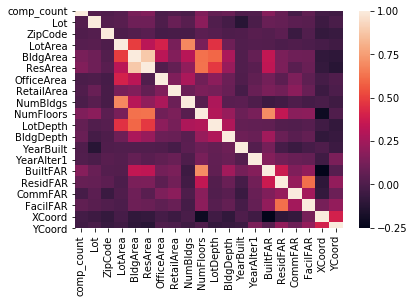

In [35]:
print("Lot: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['Lot'])))
print("ZipCode: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['ZipCode'])))
print("Lot Area: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['LotArea'])))
print("BldgArea: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['BldgArea'])))
print("ResArea: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['ResArea'])))
print("OfficeArea: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['OfficeArea'])))
print("RetailArea: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['RetailArea'])))
print("NumBldgs: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['NumBldgs'])))
print("NumFloors: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['NumFloors'])))
print("LotDepth: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['LotDepth'])))
print("BldgDepth: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['BldgDepth'])))
print("YearBuilt: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['YearBuilt'])))
print("YearAlter1: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['YearAlter1'])))
print("BuiltFAR: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['BuiltFAR'])))
print("ResidFAR': " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['ResidFAR'])))
print("CommFAR: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['CommFAR'])))
print("FacilFAR: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['FacilFAR'])))
print("XCoord: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['XCoord'])))
print("YCoord: " + str(stats.pearsonr(df_3.dropna()['comp_count'], df_3.dropna()['YCoord'])))

sns.heatmap(df_3.corr())

-->
Eine statistische signifikant aber schwache Korrelation zwischen Beschwerdeanzahl zu
* BldgArea (= total floor area) und 
* ResArea (= exterior area) und 
* NumFloors (= number of floors) und 
* BuiltFAR (= total building floor area divided by the area of the tax lot).
* Keine starke Korrelation

## Spearman Korrelation

Lot: SpearmanrResult(correlation=-0.035715087431686776, pvalue=1.2530166278468881e-08)
ZipCode: SpearmanrResult(correlation=0.0291614608091371, pvalue=3.3626700459174172e-06)
Lot Area: SpearmanrResult(correlation=0.2862677429710603, pvalue=0.0)
BldgArea: SpearmanrResult(correlation=0.3723599890233795, pvalue=0.0)
ResArea: SpearmanrResult(correlation=0.4016111449425641, pvalue=0.0)
OfficeArea: SpearmanrResult(correlation=-0.0378377148481502, pvalue=1.630529199958299e-09)
RetailArea: SpearmanrResult(correlation=0.00028686055640654963, pvalue=0.9635446616208271)
NumBldgs: SpearmanrResult(correlation=-0.06418075706356698, pvalue=1.3597845585499963e-24)
NumFloors: SpearmanrResult(correlation=0.3522926252209746, pvalue=0.0)
LotDepth: SpearmanrResult(correlation=0.13301183479742795, pvalue=1.4787753513404387e-100)
BldgDepth: SpearmanrResult(correlation=0.3177422266171023, pvalue=0.0)
YearBuilt: SpearmanrResult(correlation=0.037552369838897384, pvalue=2.1588094157111837e-09)
YearAlter1: Spearm

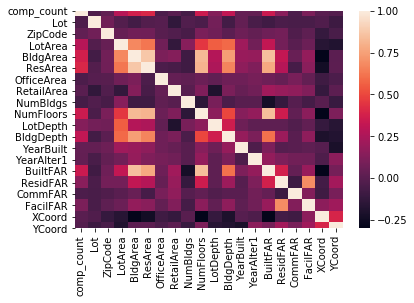

In [36]:
print("Lot: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['Lot'])))
print("ZipCode: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['ZipCode'])))
print("Lot Area: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['LotArea'])))
print("BldgArea: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['BldgArea'])))
print("ResArea: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['ResArea'])))
print("OfficeArea: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['OfficeArea'])))
print("RetailArea: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['RetailArea'])))
print("NumBldgs: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['NumBldgs'])))
print("NumFloors: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['NumFloors'])))
print("LotDepth: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['LotDepth'])))
print("BldgDepth: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['BldgDepth'])))
print("YearBuilt: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['YearBuilt'])))
print("YearAlter1: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['YearAlter1'])))
print("BuiltFAR: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['BuiltFAR'])))
print("ResidFAR': " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['ResidFAR'])))
print("CommFAR: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['CommFAR'])))
print("FacilFAR: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['FacilFAR'])))
print("XCoord: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['XCoord'])))
print("YCoord: " + str(stats.spearmanr(df_3.dropna()['comp_count'], df_3.dropna()['YCoord'])))

sns.heatmap(df_3.corr(method='spearman'))

--> Eine statistische signifikante und moderate Korrelatition besteht zwischen Beschwerdeanzahl:
* LotArea (=total area of the tax lot) und
* BldgArea(= the total gross area in square feet) und
* ResArea (=exterior area) und 
* NumFloors (= floor count) und 
* BuiltFAR (= total building floor area divided by the area of the tax lot)

* Schwache Korrelationen bestehen zudem zu ResidFAR (= Maximum Allowable Residential Floor Area Ratio) und LotDepth (= the tax lot's depth measured in feet) und FacilFAR (= Maximum Allowable Community Facility Floor Area Ratio) und NumBldgs (= number of buildings).


## Kendall Korrelation

Lot: KendalltauResult(correlation=-0.025647128950127912, pvalue=1.1595664518734531e-08)
ZipCode: KendalltauResult(correlation=0.021124494565501546, pvalue=3.390684904807942e-06)
Lot Area: KendalltauResult(correlation=0.2097171698808841, pvalue=0.0)
BldgArea: KendalltauResult(correlation=0.2719117263310551, pvalue=0.0)
ResArea: KendalltauResult(correlation=0.2936794505651271, pvalue=0.0)
OfficeArea: KendalltauResult(correlation=-0.032741921901251254, pvalue=1.673976289700824e-09)
RetailArea: KendalltauResult(correlation=0.0005161325801559847, pvalue=0.9214734124222432)
NumBldgs: KendalltauResult(correlation=-0.05553748908822079, pvalue=1.4014030486931656e-24)
NumFloors: KendalltauResult(correlation=0.2834667758495511, pvalue=0.0)
LotDepth: KendalltauResult(correlation=0.10305419918315316, pvalue=1.5649386850798127e-100)
BldgDepth: KendalltauResult(correlation=0.234090209773524, pvalue=0.0)
YearBuilt: KendalltauResult(correlation=0.0279071500897746, pvalue=1.4022763864480634e-09)
YearAlt

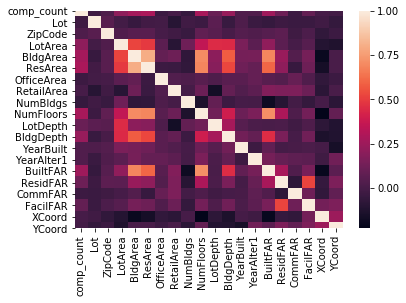

In [37]:
print("Lot: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['Lot'])))
print("ZipCode: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['ZipCode'])))
print("Lot Area: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['LotArea'])))
print("BldgArea: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['BldgArea'])))
print("ResArea: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['ResArea'])))
print("OfficeArea: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['OfficeArea'])))
print("RetailArea: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['RetailArea'])))
print("NumBldgs: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['NumBldgs'])))
print("NumFloors: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['NumFloors'])))
print("LotDepth: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['LotDepth'])))
print("BldgDepth: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['BldgDepth'])))
print("YearBuilt: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['YearBuilt'])))
print("YearAlter1: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['YearAlter1'])))
print("BuiltFAR: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['BuiltFAR'])))
print("ResidFAR': " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['ResidFAR'])))
print("CommFAR: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['CommFAR'])))
print("FacilFAR: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['FacilFAR'])))
print("XCoord: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['XCoord'])))
print("YCoord: " + str(stats.kendalltau(df_3.dropna()['comp_count'], df_3.dropna()['YCoord'])))

sns.heatmap(df_3.corr(method='kendall'))

-->
Eine statistisch signifikante und moderate Korrelation besteht zwischen Beschwerdeanzahl und:
* BldgArea (= total gross area in square feet) und
* ResArea (= exterior area) und
* NumFloors (= floor count) und
* BldgDepth (= depth of building ) und 
* BuiltFAR (= total building floor area divided by the area of the tax lot). 
* Eine schwache Korrelation besteht zudem zu ResidFAR (=Maximum Allowable Residential Floor Area Ratio).

# Zusammenfassung der Datenanalyse
"Heat/Hot Water", "Heating" und "Plumbing" sind die häufigsten Beschwerden.
Die Bronx hat die meisten heißes-Wasser-Beschwerden, gefolgt von Brooklyn (diese beiden Boroughs haben auch sonst am meisten Beschwerden).
ZIP-Code 11226 (Flatbush in Brooklyn) hat die meisten Wasser-Beschwerden von 37128 Fällen. ZIP-Codes 10458 (Bronx Park), 10467 (also Bronx Park), 10468 (also Bronx Park) und 10453 (Central Bronx) haben ebenfalls viele Beschwerden.
Daraus folgt, dass während Bronx am meisten Beschwerden hat, hat Brooklyn die Zip-Codes mit den meisten Beschwerden.
Drei verschiedene Korrelationsberechnung erkennen einen Zusammenhang zwischen Anzahl der Beschwerden und BldgArea (= total gross area in square feet), ResArea (= exterior Area), NumFloor (= number of floors) und BuiltFar (= total building floor area divided by the area of the tax lot).
Es gibt keine starke Korrelation, nur moderate oder schwache.
Die Korrelationen sind nicht-linear (da Pearson immer am niedrigsten).
Es soll noch ein Model erzeugt werden.

In [41]:
corr = df_3.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,comp_count,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
comp_count,1,0.021,0.0049,0.025,0.13,0.15,-0.0067,0.0055,-0.0068,0.15,0.065,0.088,0.009,0.011,0.17,0.076,-0.02,0.058,-0.029,-0.039
Lot,0.021,1,0.022,0.033,0.096,0.1,0.0029,0.076,0.03,0.18,0.0073,-0.029,-0.13,-0.0077,0.083,0.07,0.043,0.031,-0.052,-0.0061
ZipCode,0.0049,0.022,1,0.0045,0.02,0.035,-0.021,-0.021,-0.02,0.04,0.028,0.004,0.0071,0.029,0.018,0.043,-0.061,0.0087,-0.079,-0.066
LotArea,0.025,0.033,0.0045,1,0.49,0.32,0.41,0.13,0.69,0.13,0.46,0.097,0.011,0.024,0.017,-0.0036,0.0081,-0.0049,-0.021,-0.043
BldgArea,0.13,0.096,0.02,0.49,1,0.87,0.32,0.16,0.31,0.61,0.61,0.29,0.013,0.074,0.35,0.13,0.1,0.09,-0.092,-0.1
ResArea,0.15,0.1,0.035,0.32,0.87,1,0.012,0.064,0.2,0.63,0.47,0.22,0.014,0.036,0.34,0.14,0.033,0.088,-0.079,-0.12
OfficeArea,-0.0067,0.0029,-0.021,0.41,0.32,0.012,1,0.14,0.28,0.1,0.19,0.095,0.0065,0.059,0.11,0.047,0.14,0.049,-0.025,0.0072
RetailArea,0.0055,0.076,-0.021,0.13,0.16,0.064,0.14,1,0.086,0.13,0.13,0.08,-0.018,0.08,0.13,0.11,0.18,0.08,-0.053,0.0035
NumBldgs,-0.0068,0.03,-0.02,0.69,0.31,0.2,0.28,0.086,1,0.034,0.28,0.038,0.045,0.0029,-0.049,-0.037,0.0025,-0.026,-0.012,-0.047
NumFloors,0.15,0.18,0.04,0.13,0.61,0.63,0.1,0.13,0.034,1,0.29,0.22,0.095,0.13,0.71,0.34,0.17,0.19,-0.21,0.0097


In [38]:
#count hot water complaints in brooklyn per address
df_count=df_comp.loc[(df_comp["complaint_type"]=="HEAT/HOT WATER")]["incident_address"].value_counts()

df_count = df_count.to_frame().reset_index()
df_count.columns = ["Address","comp_count"]

#combine number of complaints and PLUTO set into one dataframe
df_3=pd.merge(df_count, df_brook, on='Address', how='left')
df_3

,Address,comp_count,Lot,ZipCode,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,...,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord
0,89-21 ELMHURST AVENUE,9180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1025 BOYNTON AVENUE,5207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34 ARDEN STREET,4907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9511 SHORE ROAD,3890,7502.0,11209.0,30380.0,115672.0,109472.0,0.0,0.0,1.0,...,0.0,0.0,1957.0,0.0,3.81,4.00,0.0,4.0,973758.0,163829.0
4,2090 EAST TREMONT AVENUE,3570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92120,184 JACKSON STREET,1,18.0,11211.0,2500.0,3750.0,3750.0,0.0,0.0,1.0,...,100.0,50.0,1928.0,0.0,1.50,2.00,0.0,2.0,999906.0,200336.0
92121,649 WEST 138 STREET,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92122,398 BAINBRIDGE STREET,1,30.0,11233.0,1725.0,2175.0,1450.0,0.0,0.0,1.0,...,100.0,42.0,1901.0,0.0,1.26,1.35,0.0,2.0,1006185.0,187721.0
92123,387 FENIMORE STREET,1,76.0,11225.0,2000.0,2880.0,1920.0,0.0,0.0,1.0,...,100.0,64.0,1930.0,0.0,1.44,2.43,0.0,4.8,998229.0,179357.0
